In [276]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [277]:
output_path = 'output/models/'

import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [278]:
# Import prospective dataset
df = pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [279]:
df_ori = df.copy()

In [280]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3395
Number of variables in Combined dataset 161


In [281]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [282]:
df.head(5)

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21 00:00:00.0,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,NaN,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,Benign,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),Tumou

In [283]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 161 columns):
PATIENTNUMBER                         3395 non-null object
PROCNAME                              3395 non-null object
CENTERCODE                            3395 non-null object
SURGEONCODE                           949 non-null object
RECPROGRESS                           3395 non-null object
CREATEDDATE                           3395 non-null object
GENDER                                3384 non-null object
DATEOFBIRTH                           2028 non-null float64
AGEATSURGERY                          3376 non-null float64
MARITALSTATUS                         2160 non-null object
RACE                                  2099 non-null object
EDUCATION                             1927 non-null object
WEIGHT                                2363 non-null float64
HEIGHT                                2361 non-null float64
BMI                                   3009 non-null float64
CLI

### Prepare Target Variable

In [284]:
# Drop records which have both malign and benin cancer (This is an error in database)

print("Number of records with both Malign and Benign cancer {}". format(len(df[(df['HYSTOTYPEBENIGN']=='Yes') & (df['HYSTOTYPEMALIGNANAT']=='Yes')].index)))

# drop the records
df.drop(df[(df['HYSTOTYPEBENIGN']=='Yes') & (df['HYSTOTYPEMALIGNANAT']=='Yes')].index, inplace=True)

Number of records with both Malign and Benign cancer 12


In [285]:
# Exploring target Variables
print("Unique values for HYSTOTYPE MALIGNANAT \n\n{}\n".format(df['HYSTOTYPEMALIGNANATYES'].value_counts()))
print("Unique values for HYSTOTYPE BENIGN \n\n{}".format(df['HYSTOTYPEBENIGNYES'].value_counts()))

Unique values for HYSTOTYPE MALIGNANAT 

Clear cell renal cell carcinoma                 1842
Papillary renal cell carcinoma                   469
Chromophobe renal cell carcinoma                 213
Renal cell carcinoma unclassified                 69
Metastatic tumors                                  3
Mucinous tubular and spindle cell carcinoma        2
Carcinoma of the collecting ducts of Bellini       2
Multilocular clear cell renal cell carcinoma       2
Xp11 translocation carcinomas                      1
Name: HYSTOTYPEMALIGNANATYES, dtype: int64

Unique values for HYSTOTYPE BENIGN 

Oncocytoma                            296
Angiomyolipoma                        190
Benign Cyst                            69
Other                                  64
Xanthogranulomatous Pyelonephritis      8
Metanephric Adenoma                     3
Mixed Epithelial and Stromal Tumor      2
Papillary Adenoma                       1
Name: HYSTOTYPEBENIGNYES, dtype: int64


In [286]:
# Create dict mapping 
malign_dict = {'Clear cell renal cell carcinoma':1,
               'Papillary renal cell carcinoma' :2,
               'Chromophobe renal cell carcinoma':3,
               'Renal cell carcinoma unclassified':4,
               'Metastatic tumors': 4,
               'Mucinous tubular and spindle cell carcinoma': 4,
               'Carcinoma of the collecting ducts of Bellini':4,
               'Multilocular clear cell renal cell carcinoma':4,
               'Xp11 translocation carcinomas':4
              }

benign_dict = {'Oncocytoma' : 5,
               'Angiomyolipoma':5,
               'Benign Cyst' : 5,
               'Other':5,
               'Xanthogranulomatous Pyelonephritis':5,
               'Metanephric Adenoma':5,
               'Mixed Epithelial and Stromal Tumor':5,
               'Papillary Adenoma':5
               
              }
hytotype_dict = {}
hytotype_dict.update(malign_dict)
hytotype_dict.update(benign_dict)

In [287]:
#create new target variable by combining 'HYSTOTYPEMALIGNANATYES' and 'HYSTOTYPEBENIGNYES'
df['combined_hystotype'] = df['HYSTOTYPEMALIGNANATYES'].copy()
df.loc[df['combined_hystotype'].isnull(),'combined_hystotype'] = df['HYSTOTYPEBENIGNYES'].copy()

In [288]:
# Drop records with missing target value
df.dropna(axis = 'index', how = 'any',subset=['combined_hystotype'],inplace = True)

In [289]:
# Map target value to labels
df['combined_hystotype'] = df['combined_hystotype'].map(hytotype_dict).copy()

In [290]:
df['combined_hystotype'].value_counts(normalize=True)

1    0.569221
5    0.195612
2    0.144932
3    0.065822
4    0.024413
Name: combined_hystotype, dtype: float64

In [291]:
df.drop(df[df['combined_hystotype'].isin([4,8,7])].index, inplace = True)

### Define numeric columns and replace encoded missing values with NaN

In [292]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
] 

In [293]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [294]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,combined_hystotype
count,1853.00,3144.00,2210.00,2208.00,2817.00,2983.00,2633.00,2569.00,2361.00,2269.00,1971.00,3100.00,121.00,2447.00,149.00,1992.00,1882.00,2606.00,2928.00,3059.00,1196.00,1364.00,2204.00,1696.00,877.00,534.00,574.00,754.00,543.00,461.00,408.00,418.00,622.00,381.00,399.00,3038.00,2827.00,1476.00,636.00,2675.00,1350.00,2337.00,1956.00,1855.00,3154.00,3157.00
mean,1956.21,57.70,89.36,164.12,28.72,34.37,1.54,3.54,19.64,45.54,7182.05,4.01,604.88,80.39,696.32,8.42,1.89,1.05,19.98,188.55,47.91,56.96,18.09,96.83,1932.56,165.87,161.59,107.31,213.20,2699.18,222.75,257.82,135.91,284.25,2711.74,3.87,10.91,71.00,185.44,132.21,14.91,0.28,1.13,17.02,2013.24,2.09
std,13.25,12.71,50.18,40.44,5.96,34.72,2.02,2.28,75.68,97.59,3354.66,53.80,463.89,30.82,410.09,1.75,0.82,0.27,37.80,228.11,173.75,160.13,128.29,168.13,4224.85,351.00,337.61,307.47,344.31,4960.83,404.74,413.88,341.31,396.46,4131.69,25.67,24.03,249.15,378.84,335.82,143.23,0.45,31.94,19.72,2.98,1.56
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,16.84,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00,1.00
25%,1947.00,49.00,69.00,160.00,24.57,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,74.65,65.47,152.00,7.00,1.00,1.00,14.00,50.00,11.00,30.40,0.96,52.00,9.13,10.90,26.83,0.91,49.36,9.40,10.70,28.50,0.90,55.00,8.90,2.00,2.40,1.00,2.00,2.00,0.00,0.00,0.00,3.00,2011.00,1.00
50%,1955.00,59.00,80.00,169.95,27.60,30.00,1.00,3.00,13.90,40.80,6970.00,0.91,999.00,79.31,999.00,8.00,2.00,1.00,18.00,100.00,12.10,35.00,1.00,64.90,11.50,12.30,34.00,1.17,67.67,11.90,12.11,35.00,1.12,74.00,999.00,3.00,3.60,2.00,5.00,2.00,0.00,0.00,0.00,10.00,2013.00,1.00
75%,1965.00,67.00,93.30,176.00,31.79,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,93.96,999.00,10.00,3.00,1.00,23.00,200.00,13.30,38.30,1.30,80.46,18.40,14.58,40.38,1.59,94.98,3420.00,14.00,44.10,1.52,122.00,4300.00,4.00,8.00,5.00,25.00,3.00,0.00,1.00,0.00,24.00,2016.00,3.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,999.00,101.00,2018.00,5.00


In [295]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [296]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [297]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,combined_hystotype
count,1853.00,3144.00,2202.00,2205.00,2817.00,2980.00,2633.00,2569.00,2347.00,2246.00,1951.00,3091.00,51.00,2432.00,53.00,1992.00,1882.00,2606.00,2924.00,3056.00,1158.00,1326.00,2167.00,1636.00,836.00,454.00,494.00,674.00,452.00,435.00,321.00,319.00,538.00,289.00,313.00,3036.00,2826.00,1375.00,522.00,2326.00,1319.00,2337.00,1954.00,1855.00,3154.00,3157.00
mean,1956.21,57.70,88.10,162.98,28.72,33.39,1.54,3.54,13.79,35.78,7245.44,1.12,63.93,79.90,148.07,8.42,1.89,1.05,18.64,187.75,16.70,29.96,1.34,65.94,1978.35,19.07,25.98,1.47,62.96,2800.80,12.36,27.80,1.16,66.06,3182.33,3.22,10.56,4.14,11.21,2.15,0.13,0.28,0.11,17.02,2013.24,2.09
std,13.25,12.71,37.38,26.22,5.96,16.39,2.02,2.28,1.77,14.57,3312.55,3.38,22.77,24.63,56.17,1.75,0.82,0.27,10.85,226.80,22.29,14.00,4.74,21.74,4322.14,27.92,15.88,6.68,24.79,5089.26,11.20,22.82,0.57,37.27,4554.73,2.49,15.22,10.57,46.88,0.67,2.33,0.45,0.63,19.72,2.98,1.56
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,16.84,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00,1.00
25%,1947.00,49.00,69.00,160.00,24.57,22.00,0.00,2.00,12.85,36.00,5600.00,0.78,42.78,65.21,110.00,7.00,1.00,1.00,14.00,50.00,11.00,30.13,0.96,51.22,9.10,10.70,0.44,0.90,45.91,9.25,10.40,24.95,0.85,49.69,8.40,2.00,2.40,1.00,1.85,2.00,0.00,0.00,0.00,3.00,2011.00,1.00
50%,1955.00,59.00,79.80,169.60,27.60,30.00,1.00,3.00,13.90,40.70,7000.00,0.91,60.00,79.05,130.00,8.00,2.00,1.00,18.00,100.00,12.00,35.00,1.00,64.00,11.30,11.90,32.50,1.10,62.26,11.50,11.60,32.80,1.07,65.00,11.40,3.00,3.55,2.00,3.00,2.00,0.00,0.00,0.00,10.00,2013.00,1.00
75%,1965.00,67.00,93.00,176.00,31.79,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,85.00,93.44,177.00,10.00,3.00,1.00,23.00,200.00,13.10,38.00,1.30,78.12,15.60,13.20,36.88,1.40,79.00,5220.00,12.70,37.00,1.27,80.00,6600.00,4.00,8.00,4.00,8.00,3.00,0.00,1.00,0.00,24.00,2016.00,3.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,116.80,253.97,340.00,14.00,3.00,6.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,4.00,70.00,1.00,12.00,101.00,2018.00,5.00


In [298]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [299]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

### Define Categorical columns

In [300]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [301]:
# list of variables included for Intra-Op complications 
intra_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
#'Consistencyoftheotherexcisedtumors',
#'ACCESS',
#'DAVINCIMODEL',
#'ROBOTICSARMS',
#'ASSISTENTTROCARS',
#'DUALCONSOLE',
#'PRIMARYSURGEON',
#'OPERATIVETIMEmin',
#'ISCHEMIA',
#'CLAMPARTERY',
#'SELECTIVEARTERIALCLAMPING',
#'CLAMPVEIN',
#'EARLYUNCLAMPING',
#'FLUORESCENCE',
#'INNERRENORRHAPHY',
#'OUTERRENORRHAPHY',
#'ISCHEMIATIMEmin',
#'UCSREPAIR',
#'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails',
#'LYMPHNODEDISSECTIONLND',
#'BLOODLOSSml',
#'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS',
#'INTRAOPCOMPLICATION',
#'INTRAOPCOMPLICATIONS',
'combined_hystotype'   
]

In [302]:
len(intra_op_col)

49

### Data Cleaning

In [303]:
# Selecting dataframe relevant columsn for analysis
df = df[intra_op_col].copy()

In [304]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 49
Total number of columns left after removing columns with more than 50% missing data: 43


In [305]:
target = 'combined_hystotype'

In [306]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,combined_hystotype
count,3144.000000,2817.000000,2980.000000,2633.000000,2347.000000,2246.000000,1951.000000,3091.000000,2432.000000,1882.000000,2606.000000,3157.000000
mean,57.702290,28.720182,33.394329,1.537790,30.181278,41.332012,7559.523803,1.115949,79.904673,1.892667,1.053338,2.085524
std,12.706848,5.961424,16.386733,2.023277,119.171866,6.198379,5081.719781,3.377051,24.629698,0.815949,0.274009,1.564914
min,16.000000,15.100000,0.000000,0.000000,10.000000,10.400000,0.000000,0.000000,0.020000,1.000000,0.000000,1.000000
25%,49.000000,24.570000,22.000000,0.000000,12.900000,38.300000,5700.000000,0.780000,65.205739,1.000000,1.000000,1.000000
50%,59.000000,27.600000,30.000000,1.000000,14.000000,41.600000,7100.000000,0.910000,79.048101,2.000000,1.000000,1.000000
75%,67.000000,31.790000,42.000000,2.000000,15.000000,44.500000,8540.000000,1.100000,93.439213,3.000000,1.000000,3.000000
max,89.000000,55.600000,135.000000,19.000000,990.000000,180.000000,186000.000000,96.000000,253.971416,3.000000,6.000000,5.000000


In [307]:
numeric_stats = df.describe()

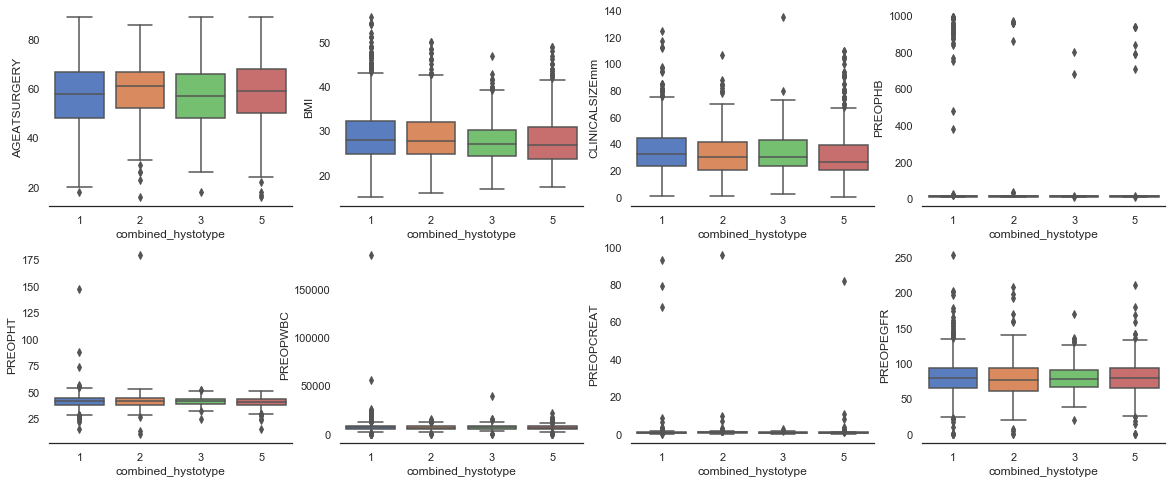

In [308]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [309]:
# Check the number of outliers
outlier_dict = {}
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    outlier_dict.update({i:{'LL':LL,'UL':UL}})
    print('{:<14s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])), 'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))
print(outlier_dict)

BMI              90    0 UL-LL 42.62-13.74
CLINICALSIZEmm   72    0 UL-LL 72.00--8.00
PREOPHB          52    0 UL-LL 18.15-9.75
PREOPHT           8   29 UL-LL 53.80-29.00
PREOPWBC         79   37 UL-LL 12800.00-1440.00
PREOPCREAT      149    2 UL-LL 1.58-0.30
PREOPEGFR        49   25 UL-LL 135.79-22.86
{'BMI': {'LL': 13.740000000000002, 'UL': 42.62}, 'CLINICALSIZEmm': {'LL': -8.0, 'UL': 72.0}, 'PREOPHB': {'LL': 9.75, 'UL': 18.15}, 'PREOPHT': {'LL': 28.999999999999993, 'UL': 53.800000000000004}, 'PREOPWBC': {'LL': 1440.0, 'UL': 12800.0}, 'PREOPCREAT': {'LL': 0.29999999999999993, 'UL': 1.58}, 'PREOPEGFR': {'LL': 22.85552678498027, 'UL': 135.7894249037853}}


In [310]:
#Export the outlier dict
import json
with open(output_path + "outlier_dict.json", "w") as write_file:
    json.dump(outlier_dict, write_file)

In [311]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [312]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,combined_hystotype
count,2636.000000,2353.000000,2530.000000,2213.000000,1982.000000,1886.000000,1593.000000,2604.000000,1998.000000,1542.000000,2178.000000,2649.000000
mean,57.539074,28.113658,31.864071,1.483507,13.915873,41.602386,7168.526014,0.928672,80.917735,1.889105,1.045455,2.097773
std,12.568189,5.077662,13.938418,1.990557,1.448080,4.252245,1927.595626,0.210299,18.662554,0.816776,0.241055,1.573198
min,16.000000,15.100000,0.000000,0.000000,10.000000,29.000000,1840.000000,0.360000,34.000000,1.000000,0.000000,1.000000
25%,49.000000,24.442900,22.000000,0.000000,12.900000,38.825000,5700.000000,0.780000,67.394982,1.000000,1.000000,1.000000
50%,59.000000,27.290000,30.000000,1.000000,14.000000,41.900000,7000.000000,0.900000,80.000000,2.000000,1.000000,1.000000
75%,67.000000,31.250000,40.000000,2.000000,15.000000,44.700000,8300.000000,1.060000,93.000000,3.000000,1.000000,3.000000
max,89.000000,42.610000,71.000000,19.000000,17.800000,53.700000,12700.000000,1.570000,135.579610,3.000000,4.000000,5.000000


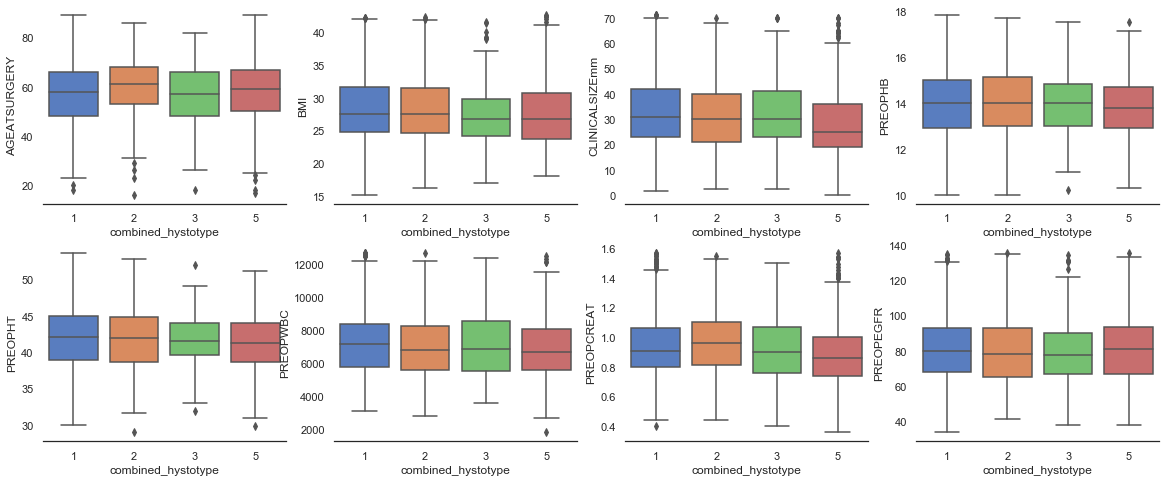

In [313]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [314]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.003775
AGEATSURGERY                          0.004908
MARITALSTATUS                         0.362401
RACE                                  0.394866
EDUCATION                             0.441299
BMI                                   0.111740
CLINICALSIZEmm                        0.044923
ECOG                                  0.456776
CHARLSONSCORE                         0.164590
SYMPTOMS                              0.234428
SOLITARYKIDNEY                        0.144205
BILATERALITYOFTUMOR                   0.389958
SIDEOFTUMOR                           0.328803
SIDEOFSURGERY                         0.002643
FACE                                  0.249151
TUMORlOCATION                         0.133635
PREOPHB                               0.251793
PREOPHT                               0.288033
PREOPWBC                              0.398641
PREOPCREAT   

In [315]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [316]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with <=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 2649
Records with <=25% missing data 1587
Records to be dropped 1062


In [317]:
# Check thenumber of missing values for eahc variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001260
MARITALSTATUS                         0.091367
RACE                                  0.103970
EDUCATION                             0.129805
BMI                                   0.068683
CLINICALSIZEmm                        0.028986
ECOG                                  0.298047
CHARLSONSCORE                         0.051040
SYMPTOMS                              0.020794
SOLITARYKIDNEY                        0.001260
BILATERALITYOFTUMOR                   0.088217
SIDEOFTUMOR                           0.086326
SIDEOFSURGERY                         0.000000
FACE                                  0.107120
TUMORlOCATION                         0.014493
PREOPHB                               0.022054
PREOPHT                               0.023314
PREOPWBC                              0.114052
PREOPCREAT   

In [318]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [319]:
#Keep columns having less than 10% missing data
df = df[df.columns[df.isnull().mean() <= 0.15]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 40


In [320]:
# Print the list of patients with clean data
patient_list = df['PATIENTNUMBER'].tolist()
with open(output_path + 'patient_list.txt', 'w') as f:
    for item in patient_list:
        f.write("%s\n" % item)

In [321]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001260
MARITALSTATUS                         0.091367
RACE                                  0.103970
EDUCATION                             0.129805
BMI                                   0.068683
CLINICALSIZEmm                        0.028986
CHARLSONSCORE                         0.051040
SYMPTOMS                              0.020794
SOLITARYKIDNEY                        0.001260
BILATERALITYOFTUMOR                   0.088217
SIDEOFTUMOR                           0.086326
SIDEOFSURGERY                         0.000000
FACE                                  0.107120
TUMORlOCATION                         0.014493
PREOPHB                               0.022054
PREOPHT                               0.023314
PREOPWBC                              0.114052
PREOPCREAT                            0.008192
PADUARISK    

In [322]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [323]:
# Create dictionary mean value for numeric columns
numeric_col_mean_dict = {}
for k in numeric_col_list:
    if k in df.columns:
        numeric_col_mean_dict.update({k:round(df[k].mean())})
print(numeric_col_mean_dict)

{'AGEATSURGERY': 57.0, 'BMI': 28.0, 'CLINICALSIZEmm': 32.0, 'PREOPHB': 14.0, 'PREOPHT': 42.0, 'PREOPWBC': 7091.0, 'PREOPCREAT': 1.0, 'NOOFLESIONS': 1.0, 'CHARLSONSCORE': 1.0}


In [324]:
# export the numeric_col_mean_dict
import json
with open(output_path+ "numeric_col_mean_dict.json", "w") as write_file:
    json.dump(numeric_col_mean_dict, write_file)

In [325]:
# Replacing missing values in numerical columns with their respective mean 
for k in numeric_col_list:
    if k in df.columns:
        df[k].fillna(round(df[k].mean()), inplace = True)

In [326]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 2648
Data columns (total 40 columns):
PATIENTNUMBER                         1587 non-null object
CENTERCODE                            1587 non-null object
GENDER                                1587 non-null object
AGEATSURGERY                          1587 non-null float64
MARITALSTATUS                         1587 non-null object
RACE                                  1587 non-null object
EDUCATION                             1587 non-null object
BMI                                   1587 non-null float64
CLINICALSIZEmm                        1587 non-null float64
CHARLSONSCORE                         1587 non-null float64
SYMPTOMS                              1587 non-null object
SOLITARYKIDNEY                        1587 non-null object
BILATERALITYOFTUMOR                   1587 non-null object
SIDEOFTUMOR                           1587 non-null object
SIDEOFSURGERY                         1587 non-null object
FACE

In [327]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 3,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3}

In [328]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [329]:
# list of features with high number of categories
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


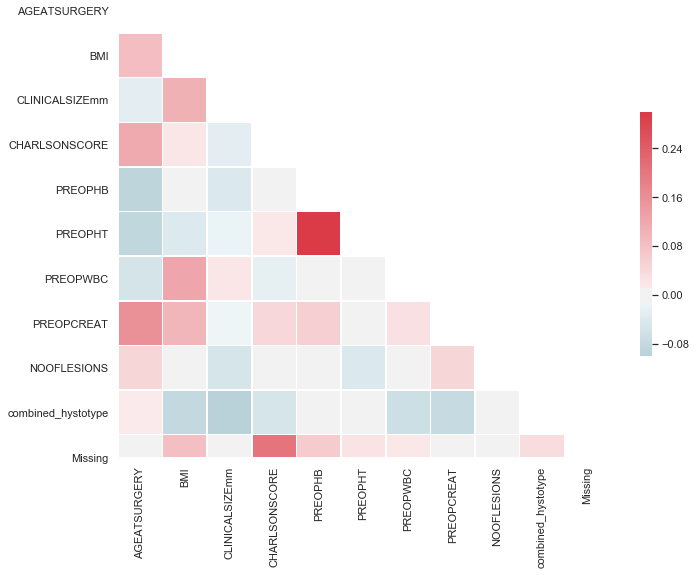

In [330]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [331]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting intra-op complications: {}".format(len(df)))

Number records for predicting intra-op complications: 1587


In [332]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [333]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [334]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Bilateral': 0, 'Left': 1, 'Right': 2},
 'FACE': 

In [335]:
# export the numeric_col_mean_dict
from joblib import dump
dump(le_dict, output_path + 'Label_enc_dict.joblib')

['output/models/Label_enc_dict.joblib']

In [336]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [337]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,combined_hystotype,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,1,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,1,0.0
1,11PAT000166,1,1,56.0,1,1,2,23.36,32.0,0.0,0,1,1,1,1,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,1,2.0
2,15PAT000088,15,0,44.0,3,4,2,29.30,57.0,0.0,1,1,1,1,1,2,2,13.5,41.3,6300.0,0.83,3,1,2,2,1,0,2,1,2,0,0,3,1,1,1,1,1.0,1,1.0
3,11PAT000124,1,0,63.0,1,1,2,32.02,32.0,1.0,0,1,1,3,2,2,0,12.4,36.5,9500.0,1.10,1,2,2,1,1,0,2,1,2,0,2,3,1,1,1,1,1.0,1,2.0
4,15PAT000080,15,1,63.0,3,4,2,25.08,37.0,2.0,0,1,1,3,2,2,4,14.4,42.7,5500.0,1.01,3,1,0,2,1,1,1,1,2,1,0,3,1,1,1,1,1.0,1,1.0


### Create Stats fot dataset

In [338]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(np.median(df[i]),np.percentile(df[i],25),np.percentile(df[i],75)))

AGEATSURGERY 57.0 [48.0-66.0]
BMI 27.3 [24.3-30.1]
CLINICALSIZEmm 30.0 [22.0-41.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.1-15.0]
PREOPHT 42.0 [39.2-44.8]
PREOPWBC 7091.0 [5805.0-8100.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]


In [339]:
#Print number of records for each category in categorical columns
for i in df_codes.columns:
    if i in cat_col:
        print(pd.DataFrame(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts()))

          CENTERCODE
GCIEYK6L         415
63DCGHNW         210
4UPDM0XB         171
4M49I4D5         166
VNO3BPES         108
08ZMCILJ          92
0VZRZWAI          69
FWL0MH42          66
QRJWT5QR          55
U5WT3NOY          50
WGC7XYXZ          39
RETM03Y8          29
57T3OUKU          29
GQHLD5Q4          29
3QWOG020          25
VRVRQ639          15
39HIP3LQ          13
94ISQMHX           6
        GENDER
Male      1032
Female     555
          MARITALSTATUS
Married            1201
Single              147
NA                  145
Divorced             48
Widowed              46
                 RACE
White/Caucasian   811
Others            338
Mongoloid/Asian   229
NA                165
Black              44
                  EDUCATION
Not Provided            651
Graduate                364
Upto High School        213
NA                      206
Post Graduate           153
                   SYMPTOMS
Absent                 1246
Local Symptoms          278
NA                       33


In [340]:
#traget_stats = pd.merge(df_codes[['PATIENTNUMBER','PATHOLOGY']],
                        #df_ori[['PATIENTNUMBER','PATHOLOGY']], 
                        #left_on='PATIENTNUMBER', 
                        #right_on='PATIENTNUMBER').copy()

In [341]:
#traget_stats

In [342]:
#traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==1]['INTRAOPTRANSUFUSION'].value_counts()

### Create Train and Test dataset 

In [343]:
df_codes.corr()['combined_hystotype']

CENTERCODE                            0.078192
GENDER                               -0.165953
AGEATSURGERY                          0.012964
MARITALSTATUS                         0.047769
RACE                                  0.125327
EDUCATION                            -0.005351
BMI                                  -0.082473
CLINICALSIZEmm                       -0.100570
CHARLSONSCORE                        -0.052493
SYMPTOMS                              0.007275
SOLITARYKIDNEY                       -0.054120
BILATERALITYOFTUMOR                   0.016153
SIDEOFTUMOR                          -0.049526
SIDEOFSURGERY                        -0.037776
FACE                                  0.009658
TUMORlOCATION                         0.034085
PREOPHB                              -0.007306
PREOPHT                              -0.005654
PREOPWBC                             -0.065097
PREOPCREAT                           -0.078215
PADUARISK                            -0.040011
POLARLOCATION

In [344]:
print('Number of patients {}'.format(len(df_codes)))
print('Distribution of hystotype \n{}'.format(df['combined_hystotype'].value_counts()))

Number of patients 1587
Distribution of hystotype 
1    958
5    294
2    217
3    118
Name: combined_hystotype, dtype: int64


In [345]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['combined_hystotype'])

In [346]:
# Percentage of complications in trainset
train['combined_hystotype'].value_counts(normalize=True)*100

1    60.360360
5    18.558559
2    13.693694
3     7.387387
Name: combined_hystotype, dtype: float64

In [347]:
# Percentage of complications in testset
test['combined_hystotype'].value_counts(normalize=True)*100

1    60.377358
5    18.448637
2    13.626834
3     7.547170
Name: combined_hystotype, dtype: float64

In [348]:
# define data output path
data_path = 'H:/RediMinds/VCQI/HYSTOTYPE/'
import os
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [349]:
df_codes.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
df_codes.to_csv(data_path+"\VCQI_clean_HYSTOTYPE.csv",index=False)

In [350]:
patient_list_train = train['PATIENTNUMBER'].tolist()
patient_list_test = test['PATIENTNUMBER'].tolist()
from joblib import dump
dump(patient_list_train, output_path + 'patient_list_train.joblib')
dump(patient_list_test, output_path + 'patient_list_test.joblib')

['output/models/patient_list_test.joblib']

In [351]:
# Save train and test dataset

train.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
test.drop(labels=['Missing','PATIENTNUMBER'], axis='columns', inplace=True)
train.to_csv(data_path+"VCQI_clean_train_HYSTOTYPE.csv",index=False)
test.to_csv(data_path+"VCQI_clean_test_HYSTOTYPE.csv",index=False)

C:\Users\anubhav\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [352]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col_HYSTOTYPE', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)